### Author: Wesam Alshli.

In [1]:
# Importing the libraries
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

In [2]:
import pandas as pd
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Getting started in scikit-learn

## scikit-learn Datasets
- Scikit-learn contains a package called **sklearn.dataset**.
- This package has several *"toy datasets"*, which are a great way to get acquainted with handling data and feed them to different ML algorithms.
- It also has generators of *random samples*, capable of constructing datasets of arbitrary complexity and size. 
- There are more advanced capabilities that can help you fetch *real datasets* used in real world problems.

### Example: iris dataset


![Iris](images/03_iris.png)

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width

### Machine learning on the iris dataset
- Framed as a **supervised learning** problem: Predict the species of an iris using the measurements
- Famous dataset for machine learning because prediction is **easy**
- Learn more about the iris dataset: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

### Loading the iris dataset into scikit-learn

In [3]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
# Load the iris dataset
iris = datasets.load_iris()

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(padnas_iris_dataset, title='Pandas Profiling Report', explorative=True)

### Explore Datasets In Pandas Using The ProfileReport() Function

In [11]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### How data is represented in scikit-learn
1. Features and target are **separate objects**
2. Features and target should be **numeric**
3. Features and target should be **NumPy arrays**
4. Features and target should have **specific shapes**

In [6]:
# check the types of the features and target
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# check the shape of the features (first dimension = number of observations, second dimensions = number of features)
print(iris.data.shape)

(150, 4)


In [8]:
# check the shape of the response (single dimension matching the number of observations)
print(iris.target.shape)

(150,)


In [9]:
# print the iris data
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
# print integers representing the species of each observation
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2

 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

 2 2]


In [11]:
# store feature matrix in "X_iris"
X_iris = iris.data

# store response vector in "y_iris"
y_iris = iris.target


### A Deeper look at your data

use pandas to look at your data easly

In [8]:
padnas_iris_dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [13]:
padnas_iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
padnas_iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 150 entries, 0 to 149

Data columns (total 5 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   sepal length (cm)  150 non-null    float64

 1   sepal width (cm)   150 non-null    float64

 2   petal length (cm)  150 non-null    float64

 3   petal width (cm)   150 non-null    float64

 4   target             150 non-null    float64

dtypes: float64(5)

memory usage: 6.0 KB


In [15]:
padnas_iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


With this target array in mind, we can use Seaborn to conveniently visualize the data:

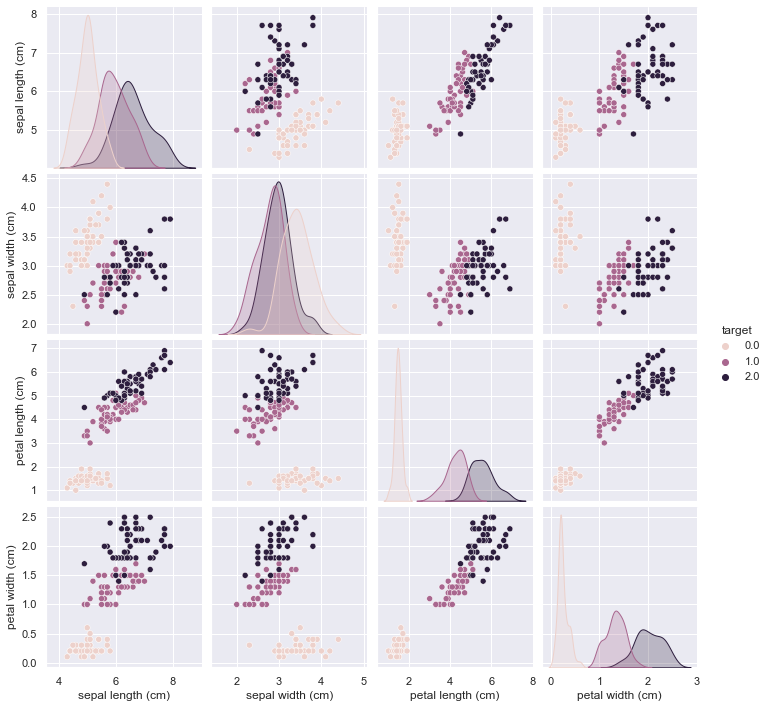

In [185]:
import seaborn as sns; sns.set()
sns.pairplot(padnas_iris_dataset,hue ='target', height=2.5);
# the diagonal shows univariate distribution of the data 

Saving figure classification_vs_clustering_plot


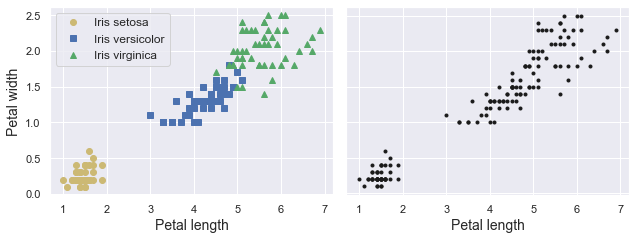

In [186]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X_iris[y_iris==0, 2],X_iris[y_iris==0, 3], "yo", label="Iris setosa")
plt.plot(X_iris[y_iris==1, 2], X_iris[y_iris==1, 3], "bs", label="Iris versicolor")
plt.plot(X_iris[y_iris==2, 2], X_iris[y_iris==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X_iris[:, 2],X_iris[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

# 1: a classifcation problem
## scikit-learn 4-step modeling pattern (very simple API)
**Step 1:** Import your model class

In [187]:
from sklearn.linear_model import LogisticRegression

**Step 2:** Instantiate an object and set the parameters

In [188]:
lr = LogisticRegression()

In [189]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

**Step 3:** Fit the model with data (aka "model training")

In [190]:
lr.fit(X_iris, y_iris)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
softmax_reg.fit(X_iris, y_iris)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

4) Apply / evaluate

In [192]:
print(lr.predict(X_iris))
print(y_iris)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1

 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2

 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

 2 2]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2

 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

 2 2]


In [193]:
print(softmax_reg.predict(X_iris))
print(y_iris)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1

 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2

 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2

 2 2]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2

 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

 2 2]


In [194]:
lr.score(X_iris, y_iris)

0.9733333333333334

In [195]:
softmax_reg.score(X_iris, y_iris)

0.98

#### But!!
We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [196]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [197]:
lr.fit(Xtrain, ytrain)
y_model = lr.predict(Xtest)

In [198]:
softmax_reg.fit(Xtrain, ytrain)
y_soft_model = softmax_reg.predict(Xtest)

Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:

In [199]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [200]:
accuracy_score(ytest, y_soft_model)

0.9736842105263158

## 2: Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA: Principal Component Analysis), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

In [203]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's lmplot to show the results:

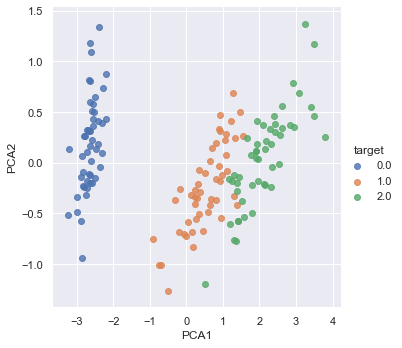

In [204]:
padnas_iris_dataset['PCA1'] = X_2D[:, 0]
padnas_iris_dataset['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='target', data=padnas_iris_dataset, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

## 3: Unsupervised learning: Iris clustering
Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use kmeans


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

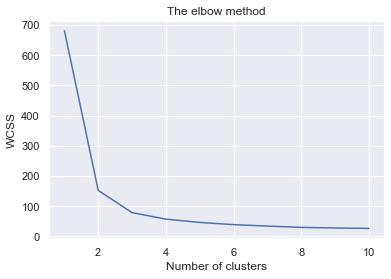

In [205]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

### We can fit the model as follows:

In [206]:
from sklearn.cluster import KMeans     # 1. Choose the model class
model = KMeans(n_clusters=3)          # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_kmeans = model.predict(X_iris)    # 4. Determine cluster labels

As before, we will add the cluster label to the Iris DataFrame and use Seaborn to plot the results:

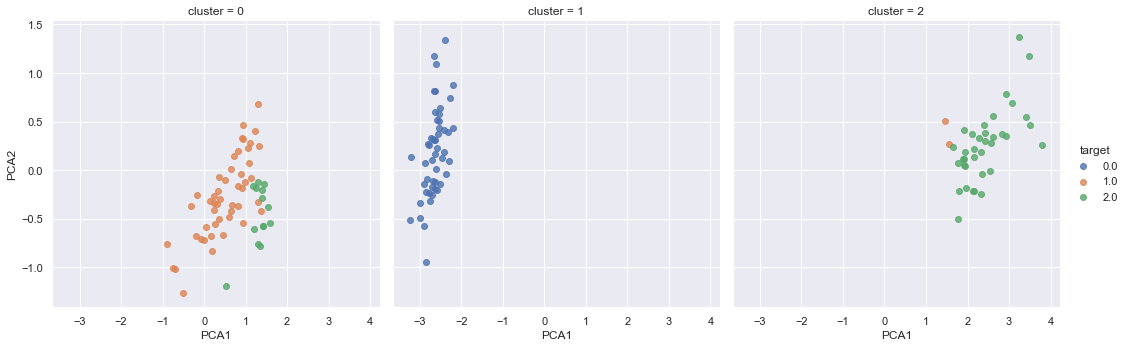

In [207]:
padnas_iris_dataset['cluster'] = y_kmeans
sns.lmplot("PCA1", "PCA2",data=padnas_iris_dataset, hue='target',
           col='cluster', fit_reg=False)

By splitting the data by cluster number, we see exactly how well the kmeans algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica. This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

###  A Gaussian mixture model Clustering:
is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [208]:
from sklearn.mixture import GaussianMixture

In [209]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X_iris).predict(X_iris)

In [210]:
y_pred 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Let's map each cluster to a class. Instead of hard coding the mapping, we will pick the most common class for each cluster (using the scipy.stats.mode() function):

In [211]:
from scipy import stats

mapping = {}
for class_id in np.unique(y_iris):
    mode, _ = stats.mode(y_pred[y_iris==class_id])
    mapping[mode[0]] = class_id

mapping

{2: 0, 0: 1, 1: 2}

In [212]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [213]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

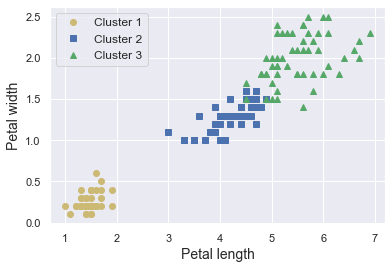

In [214]:
plt.plot(X_iris[y_pred==0, 2], X_iris[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X_iris[y_pred==1, 2], X_iris[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X_iris[y_pred==2, 2], X_iris[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [215]:
np.sum(y_pred==y_iris)

145

In [216]:
np.sum(y_pred==y_iris) / len(y_pred)

0.9666666666666667

# Decision Trees: 
to detect Feature Importance 

In [246]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[0.57167834 0.42832166]


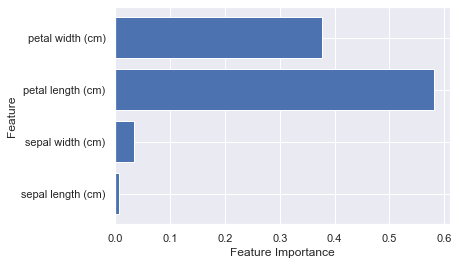

In [247]:
print(clf.feature_importances_)
import numpy as np
n_features = iris.data.shape[1]
plt.barh(range(n_features), clf_all.feature_importances_, align='center')
plt.yticks(np.arange(n_features), iris.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [248]:
from sklearn.tree import DecisionTreeClassifier
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Saving figure decision_tree_decision_boundaries_plot


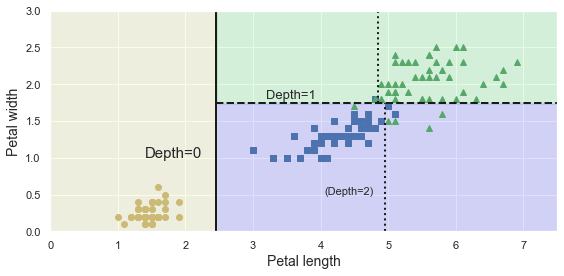

In [249]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Any questions?